# SMC-THUG Fixed Step Size

In [1]:
import numpy as np
from numpy import exp, log, zeros, eye, ceil
from numpy.linalg import norm
from numpy.random import uniform, randn, choice
from scipy.stats import norm as ndist
from warnings import catch_warnings, filterwarnings
from scipy.optimize import fsolve

from smc_thug_fixed_stepsize import SMCTHUG

In [2]:
from bip_functions import F, FL, logpriorL, log_epanechnikov_kernelL
from bip_functions import log_posteriorL, grad_FL, FL_broadcast, sample_priorL

from numpy import errstate, log, ones, zeros
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [3]:
N = 5000
B = 5
σ = 1e-8
y_bip = 1
d_bip = 3

# $\delta=0.5$

In [11]:
ϵmin = 1e-10
pmin = 0.3
pter = 0.01
δ0   = 0.5
maxiter=200
maxMCMC=10
αmax=0.9999

In [12]:
##### THUG
smc_bip_thug = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    both_stopping_criterions=True,
    αmax=αmax
)

smc_bip_thug.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_thug.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_thug.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_thug.sample_prior = sample_priorL
smc_bip_thug.get_γ = lambda i: 1.0 #i**(-1/20)  

out_bip_thug = smc_bip_thug.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: THUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 14.3146200000	 N unique starting: 3188
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3374
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0100

### SMC step:  2
ϵ = 4.2207100000	 N unique starting: 3019
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3496
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0100

### SMC step:  3
ϵ = 1.7994400000	 N unique starting: 3012
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3474
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0100

### SMC step:  4
ϵ = 1.4438600000	 N unique starting: 2984
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3268
Stepsize used in next S

Average Acceptance Probability: 0.0394
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.8221

### SMC step:  39
ϵ = 0.0020400000	 N unique starting: 1892
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0382
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.8573

### SMC step:  40
ϵ = 0.0017300000	 N unique starting: 1871
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0359
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.8866

### SMC step:  41
ϵ = 0.0014800000	 N unique starting: 1826
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0344
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.9107

### SMC step:  42
ϵ = 0.0012600000	 N unique starting: 1745
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0349
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.9301

### SMC step:  

In [13]:
##### HUG!!
smc_bip_hug = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=True,
    force_hug=True,
    both_stopping_criterions=True
)
smc_bip_hug.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_hug.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_hug.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_hug.sample_prior = sample_priorL
out_bip_hug = smc_bip_hug.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: HUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.8042400000	 N unique starting: 3162
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3449
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 4.3838500000	 N unique starting: 2951
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3552
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 1.7135400000	 N unique starting: 2994
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3490
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.3828200000	 N unique starting: 2978
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3199
Stepsize used in next SM

Average Acceptance Probability: 0.0172
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  39
ϵ = 0.0022800000	 N unique starting: 1296
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0159
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  40
ϵ = 0.0019800000	 N unique starting: 1240
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0128
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  41
ϵ = 0.0017500000	 N unique starting: 1167
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0142
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  42
ϵ = 0.0014900000	 N unique starting: 1110
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0124
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  

In [67]:
smc_bip_rwm = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=False,
    both_stopping_criterions=True
)

smc_bip_rwm.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_rwm.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_rwm.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_rwm.sample_prior = sample_priorL

out_bip_rwm = smc_bip_rwm.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: isotropic RWM.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.1819300000	 N unique starting: 3163
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1995
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 3.8415700000	 N unique starting: 2922
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1704
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 1.6770400000	 N unique starting: 2866
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1472
Stepsize used in next SMC iteration: 0.5000
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.3346300000	 N unique starting: 2792
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1196
Stepsize used 

In [15]:
from matplotlib import rc
rc('font',**{'family':'STIXGeneral'})

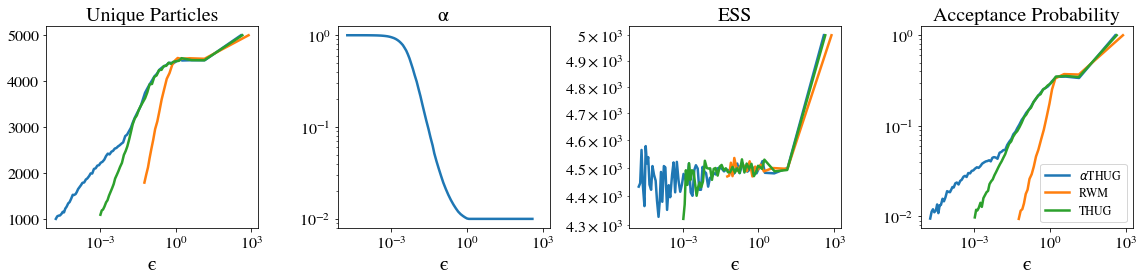

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True)
lw = 2.5
TICK_LABEL_SIZE=16
TITLE_SIZE = 20

# Unique Particles
ax[0].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['UNIQUE_PARTICLES']))), label=r'THUG-$\alpha$', lw=lw)
ax[0].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.n_unique_particles))), label='RWM', lw=lw)
ax[0].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['UNIQUE_PARTICLES']))), label='THUG', lw=lw)
ax[0].set_xlabel("ϵ", fontsize=20)
#ax[0].set_ylabel("Unique Particles")
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
ax[0].set_title("Unique Particles", fontsize=TITLE_SIZE)

# Step Sizes
# Plot \alpha since step sizes don't make sense here. 
ax[1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['ALPHAS']))), label=r'THUG-$\alpha$', lw=lw)
# ax[1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['STEP_SIZES']))), label=r'THUG-$\alpha$', lw=lw)
# ax[1].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.step_sizes[:-1]))), label='RWM', lw=lw)
# ax[1].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['STEP_SIZES']))), label='THUG', lw=lw)
ax[1].set_xlabel("ϵ", fontsize=20)
#ax[1].set_ylabel("Step Sizes")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[1].set_title(r"$\mathregular{\alpha}$", fontsize=TITLE_SIZE)

# ESS
ax[2].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['ESS']))), label=r'THUG-$\alpha$', lw=lw)
ax[2].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.ESS))), label='RWM', lw=lw)
ax[2].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['ESS']))), label='THUG', lw=lw)
ax[2].set_xlabel("ϵ", fontsize=20)
#ax[2].set_ylabel("ESS")
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[2].set_title("ESS", fontsize=TITLE_SIZE)

# Acceptance Probability
ax[3].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['AP']))), label=r'$\alpha$THUG', lw=lw)
ax[3].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.accprob))), label='RWM', lw=lw)
ax[3].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['AP']))), label='THUG', lw=lw)
ax[3].set_xlabel("ϵ", fontsize=20)
#ax[3].set_ylabel("Acceptance probability")
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[3].set_title("Acceptance Probability", fontsize=TITLE_SIZE)


plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
# plt.savefig("figures/smc_thug_new_fixeddelta_05.png", dpi=300)
plt.show()

# $\delta=0.01$

In [5]:
δ0_new   = 0.01

In [6]:
##### THUG
smc_bip_thug2 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_new,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    both_stopping_criterions=True,
    αmax=αmax
)

smc_bip_thug2.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_thug2.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_thug2.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_thug2.sample_prior = sample_priorL
smc_bip_thug2.get_γ = lambda i: 1.0 #i**(-1/20)  

out_bip_thug2 = smc_bip_thug2.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: THUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.8807900000	 N unique starting: 3167
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8820
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  2
ϵ = 5.3871200000	 N unique starting: 3044
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8808
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  3
ϵ = 2.3433300000	 N unique starting: 3005
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8869
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  4
ϵ = 1.6463900000	 N unique starting: 3013
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8860
Stepsize used in next S

Average Acceptance Probability: 0.8694
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  39
ϵ = 0.0522500000	 N unique starting: 3000
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8738
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  40
ϵ = 0.0440600000	 N unique starting: 3020
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8761
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  41
ϵ = 0.0370400000	 N unique starting: 3009
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8785
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  42
ϵ = 0.0322700000	 N unique starting: 3074
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8795
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  

Average Acceptance Probability: 0.3711
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  78
ϵ = 0.0000400000	 N unique starting: 2953
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3357
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0100

### SMC step:  79
ϵ = 0.0000300000	 N unique starting: 2955
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2920
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0101

### SMC step:  80
ϵ = 0.0000300000	 N unique starting: 2896
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2614
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0105

### SMC step:  81
ϵ = 0.0000200000	 N unique starting: 2934
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2265
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0113

### SMC step:  

Average Acceptance Probability: 0.0514
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.9759

### SMC step:  117
ϵ = 0.0000000000	 N unique starting: 1689
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0515
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.9811

### SMC step:  118
ϵ = 0.0000000000	 N unique starting: 1730
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0500
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.9852

### SMC step:  119
ϵ = 0.0000000000	 N unique starting: 1705
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0509
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.9884

### SMC step:  120
ϵ = 0.0000000000	 N unique starting: 1720
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0528
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.9909

### SMC ste

In [7]:
##### HUG!!
smc_bip_hug2 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_new,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=True,
    force_hug=True,
    both_stopping_criterions=True
)
smc_bip_hug2.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_hug2.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_hug2.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_hug2.sample_prior = sample_priorL
out_bip_hug2 = smc_bip_hug2.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: HUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 14.2956400000	 N unique starting: 3162
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8782
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 4.9998900000	 N unique starting: 2968
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8787
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 2.3273600000	 N unique starting: 3022
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8850
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.6607400000	 N unique starting: 3030
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8829
Stepsize used in next SM

Average Acceptance Probability: 0.8791
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  39
ϵ = 0.0587700000	 N unique starting: 3024
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8730
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  40
ϵ = 0.0484000000	 N unique starting: 3037
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8734
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  41
ϵ = 0.0459400000	 N unique starting: 3002
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8708
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  42
ϵ = 0.0437700000	 N unique starting: 3051
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8683
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  

Average Acceptance Probability: 0.7710
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  78
ϵ = 0.0006500000	 N unique starting: 3020
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7484
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  79
ϵ = 0.0005400000	 N unique starting: 3033
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7315
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  80
ϵ = 0.0004300000	 N unique starting: 2995
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7072
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  81
ϵ = 0.0003400000	 N unique starting: 3062
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.6773
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  

Average Acceptance Probability: 0.0157
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  117
ϵ = 0.0000000000	 N unique starting: 1036
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0134
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  118
ϵ = 0.0000000000	 N unique starting: 982
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0136
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  119
ϵ = 0.0000000000	 N unique starting: 954
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0134
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  120
ϵ = 0.0000000000	 N unique starting: 943
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0132
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step: 

In [68]:
smc_bip_rwm2 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_new,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=False,
    both_stopping_criterions=True
)

smc_bip_rwm2.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_rwm2.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_rwm2.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_rwm2.sample_prior = sample_priorL

out_bip_rwm2 = smc_bip_rwm2.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: isotropic RWM.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.3301900000	 N unique starting: 3131
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7519
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 3.6607300000	 N unique starting: 2998
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7421
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 1.6727900000	 N unique starting: 3006
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.6542
Stepsize used in next SMC iteration: 0.0100
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.2566800000	 N unique starting: 3011
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.5687
Stepsize used 

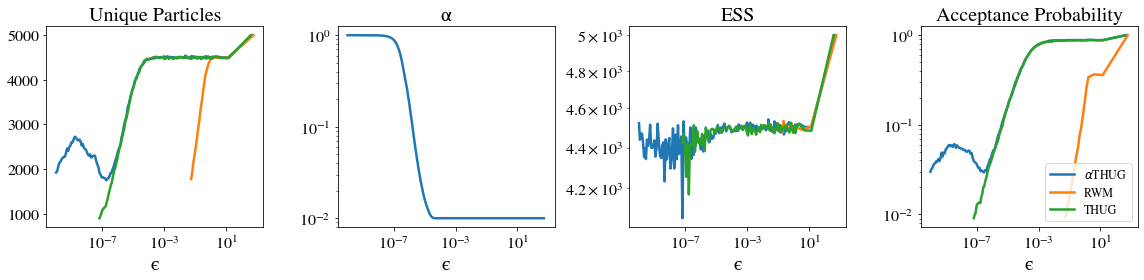

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True)
lw = 2.5
TICK_LABEL_SIZE=16
TITLE_SIZE = 20

# Unique Particles
ax[0].plot(*zip(*sorted(zip(out_bip_thug2['EPSILON'], out_bip_thug2['UNIQUE_PARTICLES']))), label=r'THUG-$\alpha$', lw=lw)
ax[0].plot(*zip(*sorted(zip(smc_bip_rwm2.EPSILON, smc_bip_rwm2.n_unique_particles))), label='RWM', lw=lw)
ax[0].plot(*zip(*sorted(zip(out_bip_hug2['EPSILON'], out_bip_hug2['UNIQUE_PARTICLES']))), label='THUG', lw=lw)
ax[0].set_xlabel("ϵ", fontsize=20)
#ax[0].set_ylabel("Unique Particles")
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
ax[0].set_title("Unique Particles", fontsize=TITLE_SIZE)

# Step Sizes
ax[1].plot(*zip(*sorted(zip(out_bip_thug2['EPSILON'], out_bip_thug2['ALPHAS']))), label=r'THUG-$\alpha$', lw=lw)
# ax[1].plot(*zip(*sorted(zip(smc_bip_rwm2.EPSILON, smc_bip_rwm2.step_sizes[:-1]))), label='RWM', lw=lw)
# ax[1].plot(*zip(*sorted(zip(out_bip_hug2['EPSILON'], out_bip_hug2['STEP_SIZES']))), label='THUG', lw=lw)
ax[1].set_xlabel("ϵ", fontsize=20)
#ax[1].set_ylabel("Step Sizes")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[1].set_title(r"$\mathregular{\alpha}$", fontsize=TITLE_SIZE)

# ESS
ax[2].plot(*zip(*sorted(zip(out_bip_thug2['EPSILON'], out_bip_thug2['ESS']))), label=r'THUG-$\alpha$', lw=lw)
ax[2].plot(*zip(*sorted(zip(smc_bip_rwm2.EPSILON, smc_bip_rwm2.ESS))), label='RWM', lw=lw)
ax[2].plot(*zip(*sorted(zip(out_bip_hug2['EPSILON'], out_bip_hug2['ESS']))), label='THUG', lw=lw)
ax[2].set_xlabel("ϵ", fontsize=20)
#ax[2].set_ylabel("ESS")
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[2].set_title("ESS", fontsize=TITLE_SIZE)

# Acceptance Probability
ax[3].plot(*zip(*sorted(zip(out_bip_thug2['EPSILON'], out_bip_thug2['AP']))), label=r'$\alpha$THUG', lw=lw)
ax[3].plot(*zip(*sorted(zip(smc_bip_rwm2.EPSILON, smc_bip_rwm2.accprob))), label='RWM', lw=lw)
ax[3].plot(*zip(*sorted(zip(out_bip_hug2['EPSILON'], out_bip_hug2['AP']))), label='THUG', lw=lw)
ax[3].set_xlabel("ϵ", fontsize=20)
#ax[3].set_ylabel("Acceptance probability")
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[3].set_title("Acceptance Probability", fontsize=TITLE_SIZE)


plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
# plt.savefig("figures/smc_thug_new.png", dpi=300)
plt.show()

# $\delta=0.1$

In [26]:
δ0_3 = 0.1

In [27]:
##### THUG
smc_bip_thug3 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_3,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    both_stopping_criterions=True,
    αmax=αmax
)

smc_bip_thug3.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_thug3.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_thug3.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_thug3.sample_prior = sample_priorL
smc_bip_thug3.get_γ = lambda i: 1.0 #i**(-1/20)  

out_bip_thug3 = smc_bip_thug3.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: THUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 12.9293100000	 N unique starting: 3160
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7264
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0100

### SMC step:  2
ϵ = 4.0118600000	 N unique starting: 3000
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7329
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0100

### SMC step:  3
ϵ = 1.8400200000	 N unique starting: 3026
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7323
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0100

### SMC step:  4
ϵ = 1.5741000000	 N unique starting: 3038
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7315
Stepsize used in next S

Average Acceptance Probability: 0.4977
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0100

### SMC step:  39
ϵ = 0.0095900000	 N unique starting: 3021
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.4612
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0100

### SMC step:  40
ϵ = 0.0074300000	 N unique starting: 3028
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.4304
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0100

### SMC step:  41
ϵ = 0.0056900000	 N unique starting: 3012
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3946
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0100

### SMC step:  42
ϵ = 0.0044100000	 N unique starting: 2959
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3645
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0100

### SMC step:  

Average Acceptance Probability: 0.0270
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.9469

### SMC step:  78
ϵ = 0.0000000000	 N unique starting: 1406
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0284
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.9591

### SMC step:  79
ϵ = 0.0000000000	 N unique starting: 1429
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0286
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.9685

### SMC step:  80
ϵ = 0.0000000000	 N unique starting: 1436
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0302
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.9758

### SMC step:  81
ϵ = 0.0000000000	 N unique starting: 1466
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0328
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.9813

### SMC step:  

Average Acceptance Probability: 0.0099
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.9999


In [30]:
##### HUG!!
smc_bip_hug3 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_3,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=True,
    force_hug=True,
    both_stopping_criterions=True
)
smc_bip_hug3.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_hug3.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_hug3.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_hug3.sample_prior = sample_priorL
out_bip_hug3 = smc_bip_hug3.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: HUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.8914300000	 N unique starting: 3158
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7214
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 4.6773700000	 N unique starting: 3019
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7278
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 2.2242200000	 N unique starting: 3036
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7286
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.5993700000	 N unique starting: 2999
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7298
Stepsize used in next SM

Average Acceptance Probability: 0.4695
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  39
ϵ = 0.0083700000	 N unique starting: 3015
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.4452
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  40
ϵ = 0.0064600000	 N unique starting: 3007
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.4134
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  41
ϵ = 0.0050200000	 N unique starting: 3031
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3754
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  42
ϵ = 0.0038700000	 N unique starting: 2996
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3423
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  

In [69]:
smc_bip_rwm3 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_3,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=False,
    both_stopping_criterions=True
)

smc_bip_rwm3.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_rwm3.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_rwm3.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_rwm3.sample_prior = sample_priorL

out_bip_rwm3 = smc_bip_rwm3.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: isotropic RWM.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.5992300000	 N unique starting: 3154
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.4850
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 3.5096000000	 N unique starting: 2990
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.4558
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 1.6463900000	 N unique starting: 3042
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3853
Stepsize used in next SMC iteration: 0.1000
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.2257900000	 N unique starting: 3005
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2925
Stepsize used 

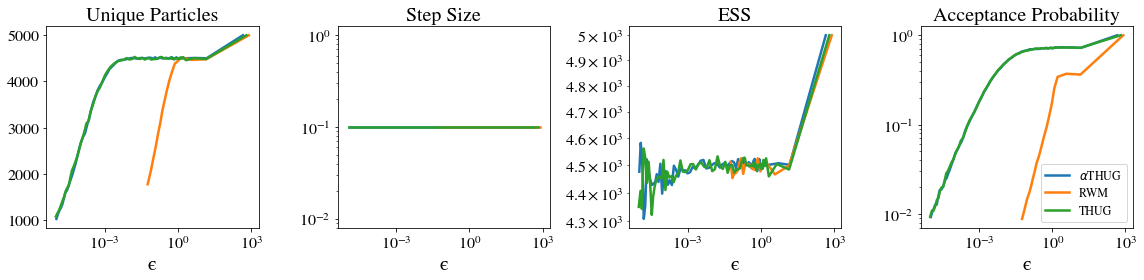

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True)
lw = 2.5
TICK_LABEL_SIZE=16
TITLE_SIZE = 20

# Unique Particles
ax[0].plot(*zip(*sorted(zip(out_bip_thug3['EPSILON'], out_bip_thug3['UNIQUE_PARTICLES']))), label=r'THUG-$\alpha$', lw=lw)
ax[0].plot(*zip(*sorted(zip(smc_bip_rwm3.EPSILON, smc_bip_rwm3.n_unique_particles))), label='RWM', lw=lw)
ax[0].plot(*zip(*sorted(zip(out_bip_hug3['EPSILON'], out_bip_hug3['UNIQUE_PARTICLES']))), label='THUG', lw=lw)
ax[0].set_xlabel("ϵ", fontsize=20)
#ax[0].set_ylabel("Unique Particles")
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
ax[0].set_title("Unique Particles", fontsize=TITLE_SIZE)

# Step Sizes
ax[1].plot(*zip(*sorted(zip(out_bip_thug3['EPSILON'], out_bip_thug3['STEP_SIZES']))), label=r'THUG-$\alpha$', lw=lw)
ax[1].plot(*zip(*sorted(zip(smc_bip_rwm3.EPSILON, smc_bip_rwm3.step_sizes[:-1]))), label='RWM', lw=lw)
ax[1].plot(*zip(*sorted(zip(out_bip_hug3['EPSILON'], out_bip_hug3['STEP_SIZES']))), label='THUG', lw=lw)
ax[1].set_xlabel("ϵ", fontsize=20)
#ax[1].set_ylabel("Step Sizes")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[1].set_title("Step Size", fontsize=TITLE_SIZE)

# ESS
ax[2].plot(*zip(*sorted(zip(out_bip_thug3['EPSILON'], out_bip_thug3['ESS']))), label=r'THUG-$\alpha$', lw=lw)
ax[2].plot(*zip(*sorted(zip(smc_bip_rwm3.EPSILON, smc_bip_rwm3.ESS))), label='RWM', lw=lw)
ax[2].plot(*zip(*sorted(zip(out_bip_hug3['EPSILON'], out_bip_hug3['ESS']))), label='THUG', lw=lw)
ax[2].set_xlabel("ϵ", fontsize=20)
#ax[2].set_ylabel("ESS")
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[2].set_title("ESS", fontsize=TITLE_SIZE)

# Acceptance Probability
ax[3].plot(*zip(*sorted(zip(out_bip_thug3['EPSILON'], out_bip_thug3['AP']))), label=r'$\alpha$THUG', lw=lw)
ax[3].plot(*zip(*sorted(zip(smc_bip_rwm3.EPSILON, smc_bip_rwm3.accprob))), label='RWM', lw=lw)
ax[3].plot(*zip(*sorted(zip(out_bip_hug3['EPSILON'], out_bip_hug3['AP']))), label='THUG', lw=lw)
ax[3].set_xlabel("ϵ", fontsize=20)
#ax[3].set_ylabel("Acceptance probability")
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[3].set_title("Acceptance Probability", fontsize=TITLE_SIZE)


plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
# plt.savefig("figures/smc_thug_new.png", dpi=300)
plt.show()

# $\delta=1.0$

In [20]:
δ0_4 = 1.0

In [21]:
##### THUG
smc_bip_thug4 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_4,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    both_stopping_criterions=True,
    αmax=αmax
)

smc_bip_thug4.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_thug4.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_thug4.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_thug4.sample_prior = sample_priorL
smc_bip_thug4.get_γ = lambda i: i**(-1/20)  

out_bip_thug4 = smc_bip_thug4.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: THUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 15.0361000000	 N unique starting: 3170
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1740
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0113

### SMC step:  2
ϵ = 4.3603900000	 N unique starting: 2943
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1735
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0128

### SMC step:  3
ϵ = 1.7271500000	 N unique starting: 2920
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1604
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0146

### SMC step:  4
ϵ = 1.4140200000	 N unique starting: 2840
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1408
Stepsize used in next S

Average Acceptance Probability: 0.0210
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.9661

### SMC step:  39
ϵ = 0.0056700000	 N unique starting: 1404
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0201
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.9730

### SMC step:  40
ϵ = 0.0048800000	 N unique starting: 1375
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0190
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.9785

### SMC step:  41
ϵ = 0.0041900000	 N unique starting: 1329
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0181
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.9829

### SMC step:  42
ϵ = 0.0036300000	 N unique starting: 1281
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0180
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.9864

### SMC step:  

In [22]:
##### HUG!!
smc_bip_hug4 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_4,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=True,
    force_hug=True,
    both_stopping_criterions=True
)
smc_bip_hug4.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_hug4.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_hug4.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_hug4.sample_prior = sample_priorL
out_bip_hug4 = smc_bip_hug4.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: HUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 14.5140400000	 N unique starting: 3168
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1754
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 4.4595800000	 N unique starting: 2907
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1707
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 1.7420000000	 N unique starting: 2873
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1623
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.4010200000	 N unique starting: 2812
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1380
Stepsize used in next SM

In [70]:
smc_bip_rwm4 = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0_4,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=False,
    both_stopping_criterions=True
)

smc_bip_rwm4.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_rwm4.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_rwm4.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_rwm4.sample_prior = sample_priorL

out_bip_rwm4 = smc_bip_rwm4.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01
### MCMC kernel: isotropic RWM.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 15.9104200000	 N unique starting: 3170
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1081
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 3.9155200000	 N unique starting: 2755
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0888
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 1.7078300000	 N unique starting: 2591
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0769
Stepsize used in next SMC iteration: 1.0000
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.4121800000	 N unique starting: 2521
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0628
Stepsize used 

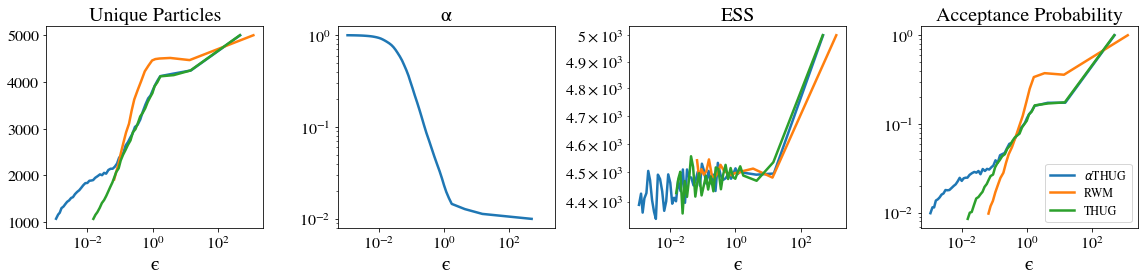

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True)
lw = 2.5
TICK_LABEL_SIZE=16
TITLE_SIZE = 20

# Unique Particles
ax[0].plot(*zip(*sorted(zip(out_bip_thug4['EPSILON'], out_bip_thug4['UNIQUE_PARTICLES']))), label=r'THUG-$\alpha$', lw=lw)
ax[0].plot(*zip(*sorted(zip(smc_bip_rwm4.EPSILON, smc_bip_rwm4.n_unique_particles))), label='RWM', lw=lw)
ax[0].plot(*zip(*sorted(zip(out_bip_hug4['EPSILON'], out_bip_hug4['UNIQUE_PARTICLES']))), label='THUG', lw=lw)
ax[0].set_xlabel("ϵ", fontsize=20)
#ax[0].set_ylabel("Unique Particles")
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
ax[0].set_title("Unique Particles", fontsize=TITLE_SIZE)

# Step Sizes
ax[1].plot(*zip(*sorted(zip(out_bip_thug4['EPSILON'], out_bip_thug4['ALPHAS']))), label=r'THUG-$\alpha$', lw=lw)
# ax[1].plot(*zip(*sorted(zip(smc_bip_rwm4.EPSILON, smc_bip_rwm4.step_sizes[:-1]))), label='RWM', lw=lw)
# ax[1].plot(*zip(*sorted(zip(out_bip_hug4['EPSILON'], out_bip_hug4['STEP_SIZES']))), label='THUG', lw=lw)
ax[1].set_xlabel("ϵ", fontsize=20)
#ax[1].set_ylabel("Step Sizes")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[1].set_title(r"$\mathregular{\alpha}$", fontsize=TITLE_SIZE)

# ESS
ax[2].plot(*zip(*sorted(zip(out_bip_thug4['EPSILON'], out_bip_thug4['ESS']))), label=r'THUG-$\alpha$', lw=lw)
ax[2].plot(*zip(*sorted(zip(smc_bip_rwm4.EPSILON, smc_bip_rwm4.ESS))), label='RWM', lw=lw)
ax[2].plot(*zip(*sorted(zip(out_bip_hug4['EPSILON'], out_bip_hug4['ESS']))), label='THUG', lw=lw)
ax[2].set_xlabel("ϵ", fontsize=20)
#ax[2].set_ylabel("ESS")
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[2].set_title("ESS", fontsize=TITLE_SIZE)

# Acceptance Probability
ax[3].plot(*zip(*sorted(zip(out_bip_thug4['EPSILON'], out_bip_thug4['AP']))), label=r'$\alpha$THUG', lw=lw)
ax[3].plot(*zip(*sorted(zip(smc_bip_rwm4.EPSILON, smc_bip_rwm4.accprob))), label='RWM', lw=lw)
ax[3].plot(*zip(*sorted(zip(out_bip_hug4['EPSILON'], out_bip_hug4['AP']))), label='THUG', lw=lw)
ax[3].set_xlabel("ϵ", fontsize=20)
#ax[3].set_ylabel("Acceptance probability")
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[3].set_title("Acceptance Probability", fontsize=TITLE_SIZE)


plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
# plt.savefig("figures/smc_thug_new.png", dpi=300)
plt.show()

# All Together (fixed step size)

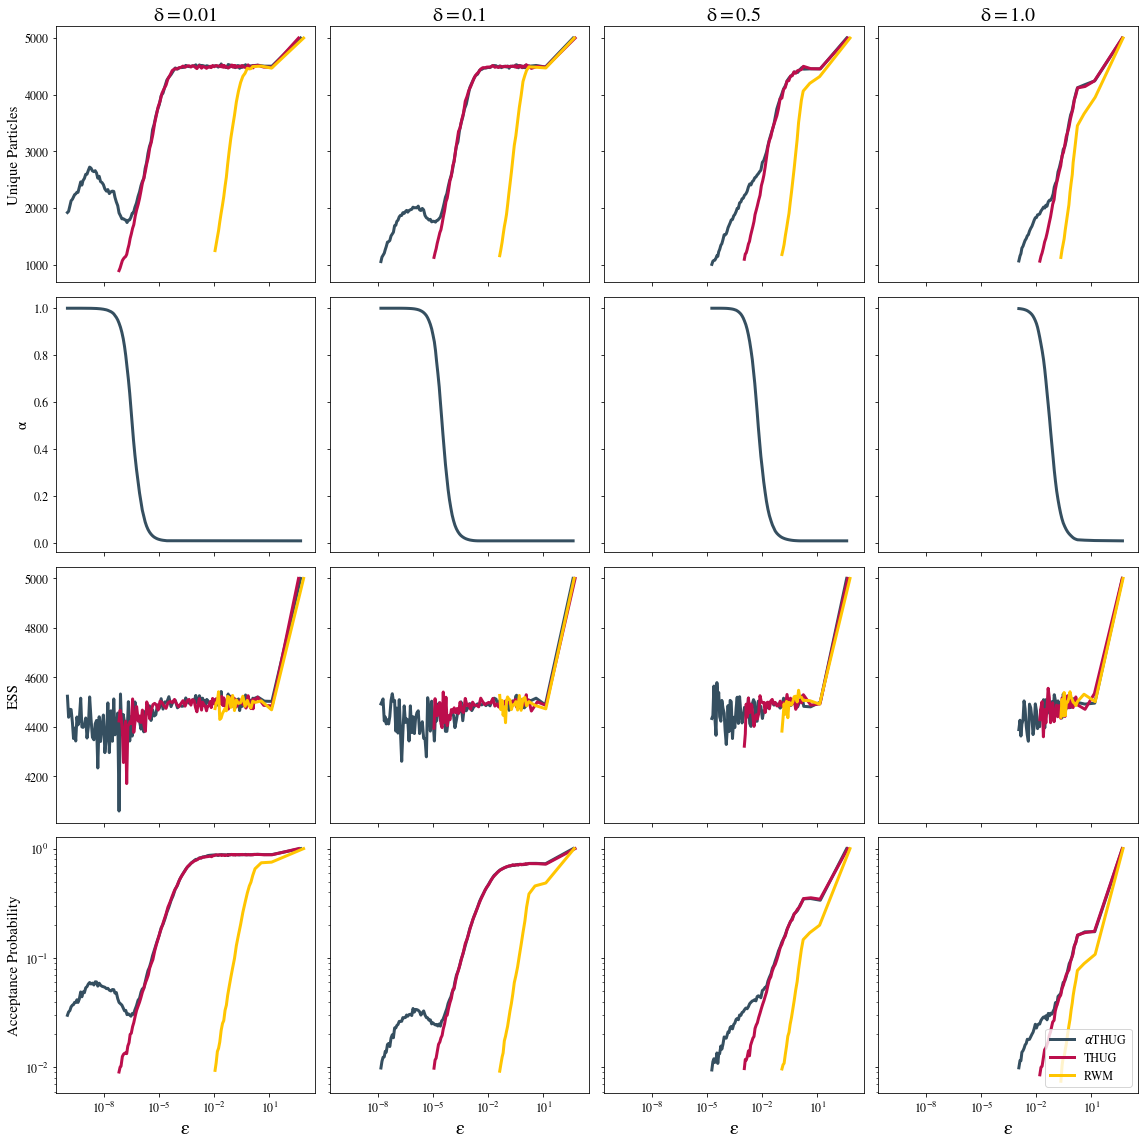

In [107]:
# Parameters
LW = 3
TICK_LABEL_SIZE=12
LABEL_SIZE = 15
TITLE_SIZE=20
# Plot meta parameters
n_rows = 4
n_cols = 4
# Storage
D = np.array([
    [out_bip_thug2, out_bip_hug2, out_bip_rwm2, δ0_new], 
    [out_bip_thug3, out_bip_hug3, out_bip_rwm3, δ0_3],
    [out_bip_thug,  out_bip_hug,  out_bip_rwm, δ0],
    [out_bip_thug4,  out_bip_hug4,  out_bip_rwm4, δ0_4]])
K = ['UNIQUE_PARTICLES', 'ALPHAS', 'ESS', 'AP']
TITLES = [r'$\mathregular{\delta=0.01}$', r'$\mathregular{\delta=0.1}$', r'$\mathregular{\delta=0.5}$', r'$\mathregular{\delta=1.0}$']
COLOR_THUG = '#354F60'
COLOR_HUG  = '#BC0E4C'
COLOR_RWM  = '#FFC501'
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, sharey='row', figsize=(16, 16))

# Row 1 - Unique Particles
for j in range(n_cols):
    # αTHUG
    ax[0, j].plot(D[j, 0]['EPSILON'], D[j, 0]['UNIQUE_PARTICLES'], label=r'$\alpha$THUG', lw=LW, color=COLOR_THUG)
    # THUG (α fixed)
    ax[0, j].plot(D[j, 1]['EPSILON'], D[j, 1]['UNIQUE_PARTICLES'], label=r'THUG', lw=LW, color=COLOR_HUG)
    # RWM
    ax[0, j].plot(D[j, 2]['EPSILON'], D[j, 2]['UNIQUE_PARTICLES'], label='RWM', lw=LW, color=COLOR_RWM)
    # Titles
    ax[0, j].set_title(TITLES[j], fontsize=TITLE_SIZE)
ax[0, 0].set_ylabel("Unique Particles", fontsize=LABEL_SIZE)


# Row 2 - Alphas
for j in range(n_cols):
    # αTHUG
    ax[1, j].plot(D[j, 0]['EPSILON'], D[j, 0]['ALPHAS'], label=r'$\alpha$THUG', lw=LW, color=COLOR_THUG)
ax[1, 0].set_ylabel(r"$\mathregular{\alpha}$", fontsize=LABEL_SIZE)

# Row 3 - ESS
for j in range(n_cols):
    # αTHUG
    ax[2, j].plot(D[j, 0]['EPSILON'], D[j, 0]['ESS'], label=r'$\alpha$THUG', lw=LW, color=COLOR_THUG)
    # THUG (α fixed)
    ax[2, j].plot(D[j, 1]['EPSILON'], D[j, 1]['ESS'], label=r'THUG', lw=LW, color=COLOR_HUG)
    # RWM
    ax[2, j].plot(D[j, 2]['EPSILON'], D[j, 2]['ESS'], label='RWM', lw=LW, color=COLOR_RWM)
ax[2, 0].set_ylabel('ESS', fontsize=LABEL_SIZE)

# Row 4 - Acceptance Probability
for j in range(n_cols):
    # αTHUG
    ax[3, j].plot(D[j, 0]['EPSILON'], D[j, 0]['AP'], label=r'$\alpha$THUG', lw=LW, color=COLOR_THUG)
    # THUG (α fixed)
    ax[3, j].plot(D[j, 1]['EPSILON'], D[j, 1]['AP'], label=r'THUG', lw=LW, color=COLOR_HUG)
    # RWM
    ax[3, j].plot(D[j, 2]['EPSILON'], D[j, 2]['AP'], label='RWM', lw=LW, color=COLOR_RWM)
ax[3, 0].set_ylabel('Acceptance Probability', fontsize=LABEL_SIZE)

# Prettify
for i in range(n_rows):
    for j in range(n_cols):
        if i == n_rows-1:
            ax[i, j].set_xlabel(r"$\mathregular{\epsilon}$", fontsize=20)
        ax[i, j].set_xscale('log')
        if i not in [0, 1, 2]:
            ax[i, j].set_yscale('log')
        ax[i, j].tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
plt.savefig('figures/smc_thug_fixedstepsize_various.png')
plt.show()